In [1]:
import numpy as np
import pandas as pd

**Reading the data**

In [2]:
df = pd.read_csv('chunk1.csv')

**Showing the little part of data**

In [3]:
df.head()

,article,summary
0,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


**Info of the data**

In [4]:
df.info

<bound method DataFrame.info of                                                  article  \
0      Sally Forrest, an actress-dancer who graced th...   
1      A middle-school teacher in China has inked hun...   
2      A man convicted of killing the father and sist...   
3      Avid rugby fan Prince Harry could barely watch...   
4      A Triple M Radio producer has been inundated w...   
...                                                  ...   
19995  By . Matt Chorley, Mailonline Political Editor...   
19996  American Jason Millard has been disqualified f...   
19997  When Lisa Whaymand's life was saved by a bone ...   
19998  Mohamed Amin has been charged with four counts...   
19999  Uruguay striker Luis Suarez scored two goals d...   

                                                 summary  
0      Sally Forrest, an actress-dancer who graced th...  
1      Works include pictures of Presidential Palace ...  
2      Iftekhar Murtaza, 29, was convicted a year ago...  
3      Prin

**Lowering the letters in data**

In [5]:
df_lower = df.copy()
df_lower[['article','summary']] = df[['article','summary']].applymap(lambda x: x.lower())
df_lower.head()

,article,summary
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th..."
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago..."
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...


**Importing the nltk and regex**

In [6]:
import nltk
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/tsovinar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Tokenizing the data**

In [7]:
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

In [8]:
df_lower['tokenized_article'] = df_lower['article'].apply(lambda x: tokenize(x))

In [9]:
df_lower['tokenized_summary'] = df_lower['summary'].apply(lambda x: tokenize(x))

**Downloading nltk stopwords corpus**

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tsovinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Importing from nltk lemmatizer stopwords stemmers**

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

**Making function for removing the stopwords**

In [12]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords.words('english')]# To remove all stopwords
    return text


In [13]:
df_lower['stopwords_article'] = df_lower['tokenized_article'].apply(lambda x: remove_stopwords(x))

In [14]:
df_lower['stopwords_summary'] = df_lower['tokenized_summary'].apply(lambda x: remove_stopwords(x))

**Making fuction for stemming and lemmatizing**

In [15]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [16]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [17]:
df_lower['stemmed_article'] = df_lower['stopwords_article'].apply(lambda x: stemming(x))
df_lower['stemmed_summary'] = df_lower['stopwords_summary'].apply(lambda x: stemming(x))
df_lower['lemma_article'] = df_lower['stopwords_article'].apply(lambda x: lemmatizing(x))
df_lower['lemma_summary'] = df_lower['stopwords_summary'].apply(lambda x: lemmatizing(x))

In [18]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopwords_article,stopwords_summary,stemmed_article,stemmed_summary,lemma_article,lemma_summary
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv..."
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,..."
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ..."
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m..."
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f..."


**Counting the words**

In [19]:
df_lower['article_word_count'] = df_lower['article'].apply(lambda x: len(x.split()))
df_lower['summary_word_count'] = df_lower['summary'].apply(lambda x: len(x.split()))

In [20]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopwords_article,stopwords_summary,stemmed_article,stemmed_summary,lemma_article,lemma_summary,article_word_count,summary_word_count
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",264,58
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",551,36
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",465,114
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",580,51
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",338,36


**Counting the sentences  making a function which will do it**

In [21]:
def split_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

In [22]:
df_lower['article_sentence_count'] = df_lower['article'].apply(lambda x: len(split_sentences(x)))

In [23]:
df_lower['summary_sentence_count'] = df_lower['summary'].apply(lambda x: len(split_sentences(x)))

**Counting the punctioan type of words**

In [24]:
df_lower['article_char_count'] = df_lower['article'].apply(lambda x: len(x.replace(" ", "")))
df_lower['summary_char_count'] = df_lower['summary'].apply(lambda x: len(x.replace(" ", "")))

In [25]:
df_lower['article_word_density'] = df_lower['article_word_count'] / (df_lower['article_char_count'] + 1)
df_lower['summary_word_density'] = df_lower['summary_word_count'] / (df_lower['summary_char_count'] + 1)


In [26]:
df_lower.head()

,article,summary,tokenized_article,tokenized_summary,stopwords_article,stopwords_summary,stemmed_article,stemmed_summary,lemma_article,lemma_summary,article_word_count,summary_word_count,article_sentence_count,summary_sentence_count,article_char_count,summary_char_count,article_word_density,summary_word_density
0,"sally forrest, an actress-dancer who graced th...","sally forrest, an actress-dancer who graced th...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, an, actress, dancer, who, gra...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...","[salli, forrest, actress, dancer, grace, silve...","[salli, forrest, actress, dancer, grace, silve...","[sally, forrest, actress, dancer, graced, silv...","[sally, forrest, actress, dancer, graced, silv...",264,58,13,2,1304,278,0.202299,0.207885
1,a middle-school teacher in china has inked hun...,works include pictures of presidential palace ...,"[a, middle, school, teacher, in, china, has, i...","[works, include, pictures, of, presidential, p...","[middle, school, teacher, china, inked, hundre...","[works, include, pictures, presidential, palac...","[middl, school, teacher, china, ink, hundr, sk...","[work, includ, pictur, presidenti, palac, yang...","[middle, school, teacher, china, inked, hundre...","[work, include, picture, presidential, palace,...",551,36,27,3,2590,164,0.212659,0.218182
2,a man convicted of killing the father and sist...,"iftekhar murtaza, 29, was convicted a year ago...","[a, man, convicted, of, killing, the, father, ...","[iftekhar, murtaza, 29, was, convicted, a, yea...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...","[man, convict, kill, father, sister, former, g...","[iftekhar, murtaza, 29, convict, year, ago, ki...","[man, convicted, killing, father, sister, form...","[iftekhar, murtaza, 29, convicted, year, ago, ...",465,114,19,5,2334,582,0.199143,0.195540
3,avid rugby fan prince harry could barely watch...,prince harry in attendance for england's crunc...,"[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, in, attendance, for, england, ...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...","[avid, rugbi, fan, princ, harri, could, bare, ...","[princ, harri, attend, england, crunch, match,...","[avid, rugby, fan, prince, harry, could, barel...","[prince, harry, attendance, england, crunch, m...",580,51,25,4,2691,243,0.215453,0.209016
4,a triple m radio producer has been inundated w...,nick slater's colleagues uploaded a picture to...,"[a, triple, m, radio, producer, has, been, inu...","[nick, slater, s, colleagues, uploaded, a, pic...","[triple, radio, producer, inundated, messages,...","[nick, slater, colleagues, uploaded, picture, ...","[tripl, radio, produc, inund, messag, prospect...","[nick, slater, colleagu, upload, pictur, faceb...","[triple, radio, producer, inundated, message, ...","[nick, slater, colleague, uploaded, picture, f...",338,36,18,3,1617,187,0.208900,0.191489


In [27]:
df_lower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   article                 20000 non-null  object 
 1   summary                 20000 non-null  object 
 2   tokenized_article       20000 non-null  object 
 3   tokenized_summary       20000 non-null  object 
 4   stopwords_article       20000 non-null  object 
 5   stopwords_summary       20000 non-null  object 
 6   stemmed_article         20000 non-null  object 
 7   stemmed_summary         20000 non-null  object 
 8   lemma_article           20000 non-null  object 
 9   lemma_summary           20000 non-null  object 
 10  article_word_count      20000 non-null  int64  
 11  summary_word_count      20000 non-null  int64  
 12  article_sentence_count  20000 non-null  int64  
 13  summary_sentence_count  20000 non-null  int64  
 14  article_char_count      20000 non-null

In [28]:
df_lower['article_sentence_density'] = df_lower['article_sentence_count'] / (df_lower['article_word_count'] + 1)
df_lower['summary_sentence_density'] = df_lower['summary_sentence_count'] / (df_lower['summary_word_count'] + 1)


In [29]:
df_lower.describe()

,article_word_count,summary_word_count,article_sentence_count,summary_sentence_count,article_char_count,summary_char_count,article_word_density,summary_word_density,article_sentence_density,summary_sentence_density
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,681.442750,55.715850,33.697050,3.77170,3281.13355,264.90255,0.207767,0.209730,0.049206,0.068954
std,340.468389,24.606035,19.518051,1.46304,1637.69818,117.25757,0.010846,0.016748,0.011454,0.015720
min,41.000000,8.000000,1.000000,1.00000,205.00000,27.00000,0.146374,0.119403,0.017895,0.009346
25%,423.000000,40.000000,20.000000,3.00000,2045.75000,187.00000,0.200366,0.198646,0.041824,0.057971
50%,616.000000,52.000000,29.000000,4.00000,2963.00000,246.00000,0.207642,0.209459,0.047244,0.071429
75%,873.250000,66.000000,43.000000,4.00000,4204.00000,310.00000,0.214994,0.220779,0.054011,0.079365
max,1917.000000,1440.000000,198.000000,77.00000,9496.00000,7134.00000,0.250000,0.288288,0.188873,0.181818


**Lets Visual see the column which will give us overall sum informations**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def plot_box_plots(data, columns, num_rows=2, num_cols=3):
   

    # Calculate the total number of plots needed
    total_plots = num_rows * num_cols

    # Create a subplot grid to accommodate the specified number of columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))
    axes = axes.flatten()

    # Plot box plots for each column in the specified list
    for i, col in enumerate(columns):
        if i < total_plots:
            ax = axes[i]
            ax.boxplot(data[col], vert=True)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")

    # Hide any remaining empty subplots (if there are fewer columns than total_plots)
    for i in range(len(columns), total_plots):
        axes[i].axis('off')

    plt.tight_layout()
def plot_histograms(data, num_rows=None, num_cols=None):
    """
    Plot histograms for each column in the DataFrame.

    Args:
        data (DataFrame): The input DataFrame containing columns to plot.
        num_rows (int): Number of rows for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.
        num_cols (int): Number of columns for subplots (optional). If not provided,
                        it will be automatically calculated based on the number of columns.

    Returns:
        None
    """
    # Get the column names from the DataFrame
    columns = data.columns

    # Calculate the number of rows and columns for the subplots
    if num_rows is None and num_cols is None:
        num_rows = int(len(columns) ** 0.5)
        num_cols = (len(columns) + num_rows - 1) // num_rows
    elif num_rows is None:
        num_rows = (len(columns) + num_cols - 1) // num_cols
    elif num_cols is None:
        num_cols = (len(columns) + num_rows - 1) // num_rows

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4))

    # Flatten the axes array to easily iterate over each subplot
    axes = axes.flatten()

    # Plot histograms for each column on the corresponding subplot
    for i, col in enumerate(columns):
        if i < len(columns):
            ax = axes[i]
            ax.hist(data[col], bins=100)
            ax.set_title(col.replace("_", " "))
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")

    # Hide any remaining empty subplots
    for i in range(len(columns), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


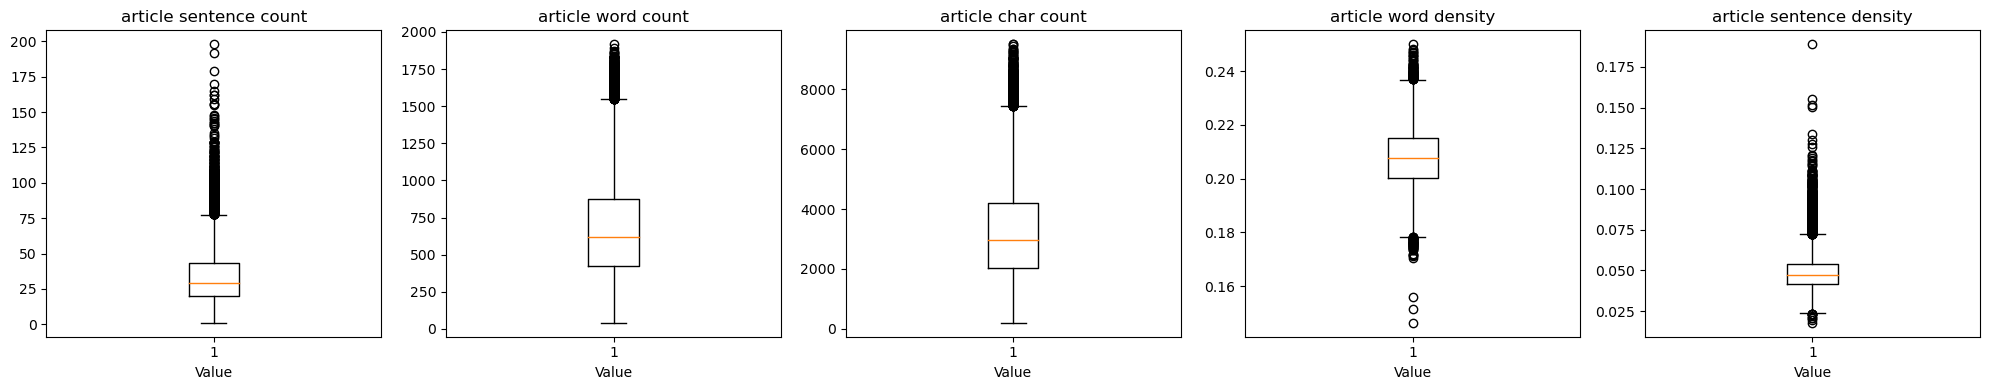

In [32]:
# select article related columns
article_columns_to_plot= ['article_sentence_count', 'article_word_count', 'article_char_count','article_word_density',
                          'article_sentence_density']
# box plot
plot_box_plots(df_lower, article_columns_to_plot, num_rows=1, num_cols=5)

In [33]:
article_columns= df_lower[['article_sentence_count', 'article_word_count', 'article_char_count','article_word_density',
                          'article_sentence_density']]

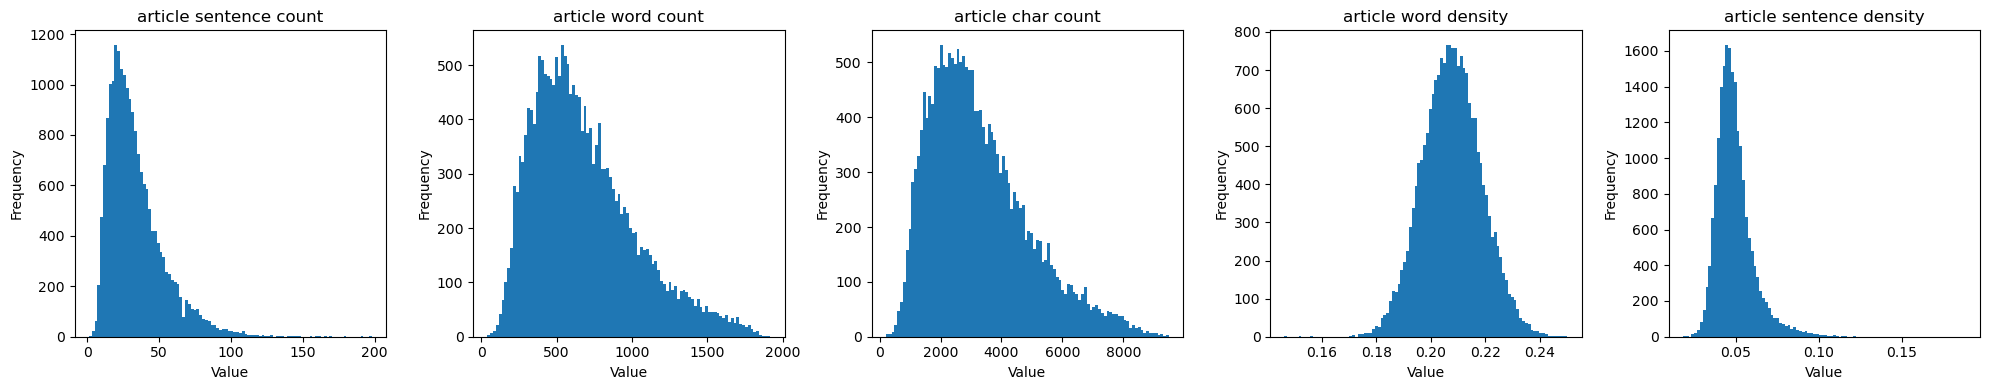

In [34]:
#histogram for the article
plot_histograms(article_columns, num_rows=1, num_cols=5)

In [35]:
summary_columns= df_lower[['summary_sentence_count', 'summary_word_count', 'summary_char_count','summary_word_density',
                          'summary_sentence_density']]

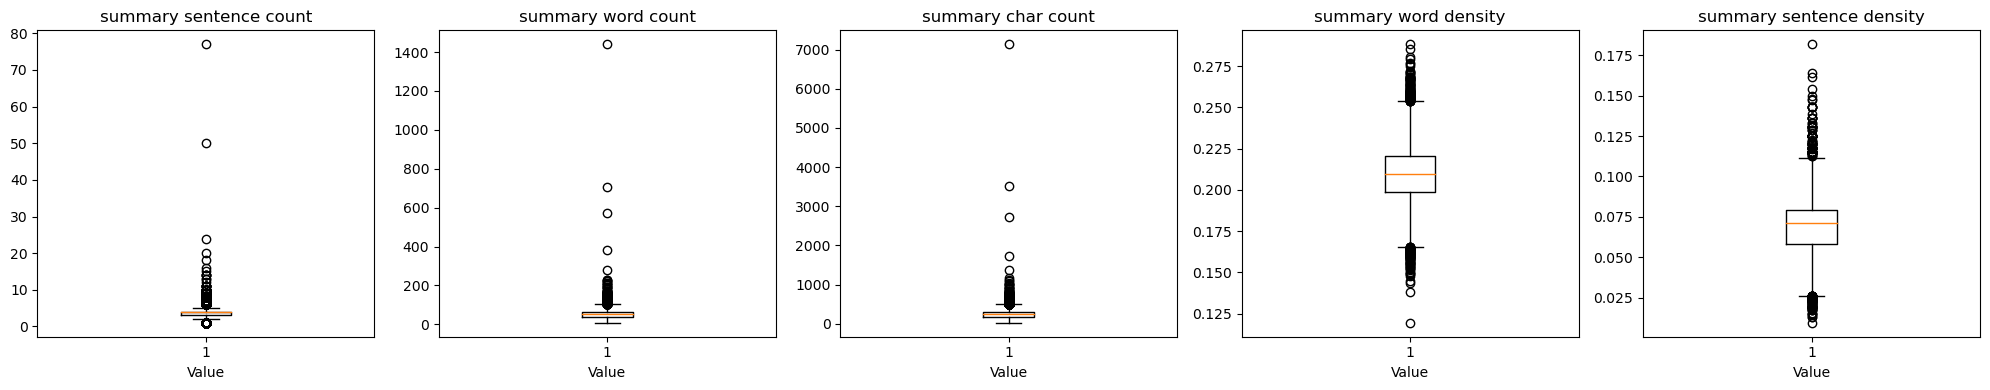

In [36]:
# select summary related columns
summary_columns_to_plot= ['summary_sentence_count', 'summary_word_count', 'summary_char_count','summary_word_density',
                          'summary_sentence_density']
# box plot
plot_box_plots(df_lower, summary_columns_to_plot, num_rows=1, num_cols=5)

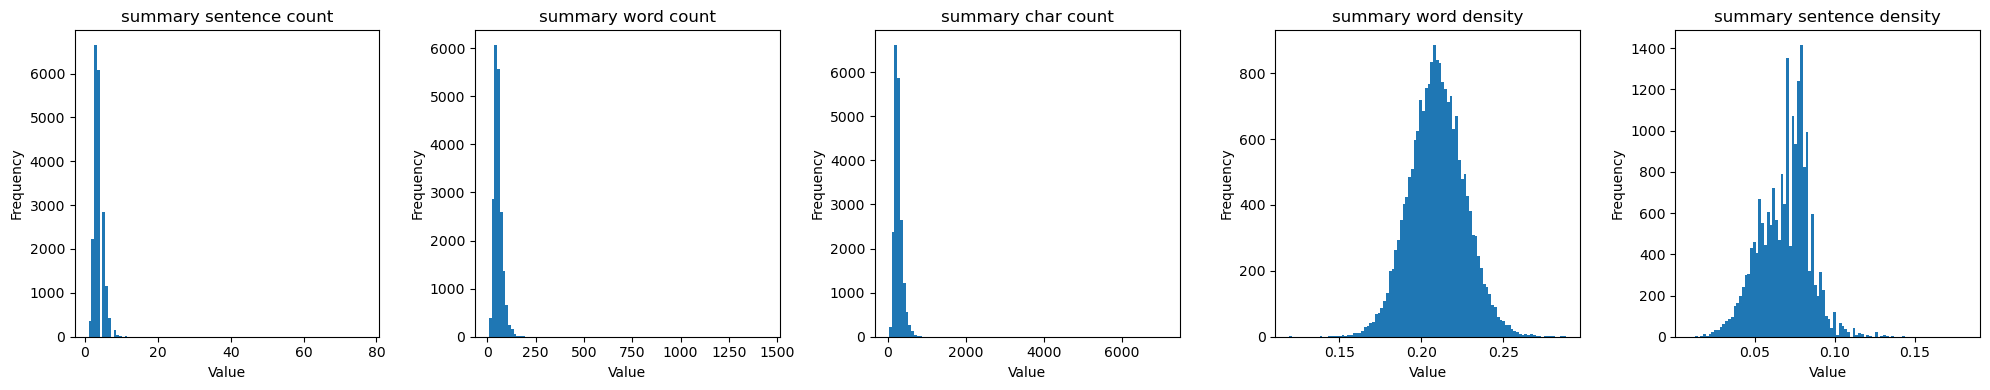

In [37]:
#histogram for the Summary
plot_histograms(summary_columns, num_rows=1, num_cols=5)

**Post tagging counting**

In [54]:
# hepler function to perform POS tags
def get_pos_tags(sentences, tagset='universal'):
    """
    Get the part-of-speech (POS) tags for a list of sentences.

    Args:
        sentences (list): A list of sentences to be POS tagged.
        tagset (str): The tagset to use for POS tagging (default is 'universal').

    Returns:
        DataFrame: A DataFrame containing the count of each POS tag for each sentence.
                  Columns are in the order: 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN',
                  'NUM', 'PRT', 'PRON', 'VERB', '.', 'X'.
    """
    pos_tags_list = []
    for sent in sentences:
        # Tokenize the sentence into words and get the POS tags using nltk.pos_tag
        pos_tags = Counter([j for i, j in nltk.pos_tag(word_tokenize(sent), tagset=tagset)])
        pos_tags_list.append(pos_tags)
    # Create the DataFrame directly from the list of dictionaries
    df = pd.DataFrame(pos_tags_list).fillna(0).astype(int)

    # Reorder the columns to match the desired order
    df = df[['ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRT', 'PRON', 'VERB', '.']]

    return df

# Identify the POS taggings for the 'article' variable
article = df_lower['article'].values
df_article = get_pos_tags(article)

# Identify the POS taggings for the 'summary' variable
summary = df_lower['summary'].values
df_summary = get_pos_tags(summary)


In [56]:
df_article.describe()

,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,63.459800,84.782000,30.854400,21.413100,70.60475,201.692650,14.827550,28.087850,39.017300,133.356400,83.037150
std,34.584511,43.205076,20.030301,13.190381,37.39398,100.842112,12.382337,15.735724,28.383102,70.914525,48.915533
min,2.000000,3.000000,0.000000,0.000000,4.00000,12.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,38.000000,52.000000,16.000000,12.000000,43.00000,126.000000,7.000000,16.000000,18.000000,80.000000,47.000000
50%,56.000000,76.000000,26.000000,19.000000,63.00000,182.000000,12.000000,25.000000,32.000000,120.000000,72.000000
75%,82.000000,109.000000,41.000000,29.000000,91.00000,258.000000,19.000000,37.000000,52.000000,173.000000,108.000000
max,270.000000,293.000000,146.000000,102.000000,271.00000,746.000000,312.000000,124.000000,235.000000,438.000000,524.000000


In [57]:
df_summary.describe()

,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.
count,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.120800,6.40620,1.73640,1.290650,3.947200,17.691850,1.552450,2.239900,2.253550,10.504150,5.905700
std,3.029747,3.67302,1.69049,1.311396,3.088882,7.994372,1.708448,1.799169,2.459729,5.742058,3.222767
min,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.00000,1.00000,0.000000,2.000000,13.000000,0.000000,1.000000,1.000000,7.000000,4.000000
50%,5.000000,6.00000,1.00000,1.000000,3.000000,17.000000,1.000000,2.000000,2.000000,10.000000,5.000000
75%,7.000000,8.00000,3.00000,2.000000,5.000000,21.000000,2.000000,3.000000,3.000000,13.000000,7.000000
max,115.000000,201.00000,52.00000,32.000000,153.000000,547.000000,61.000000,50.000000,85.000000,313.000000,174.000000


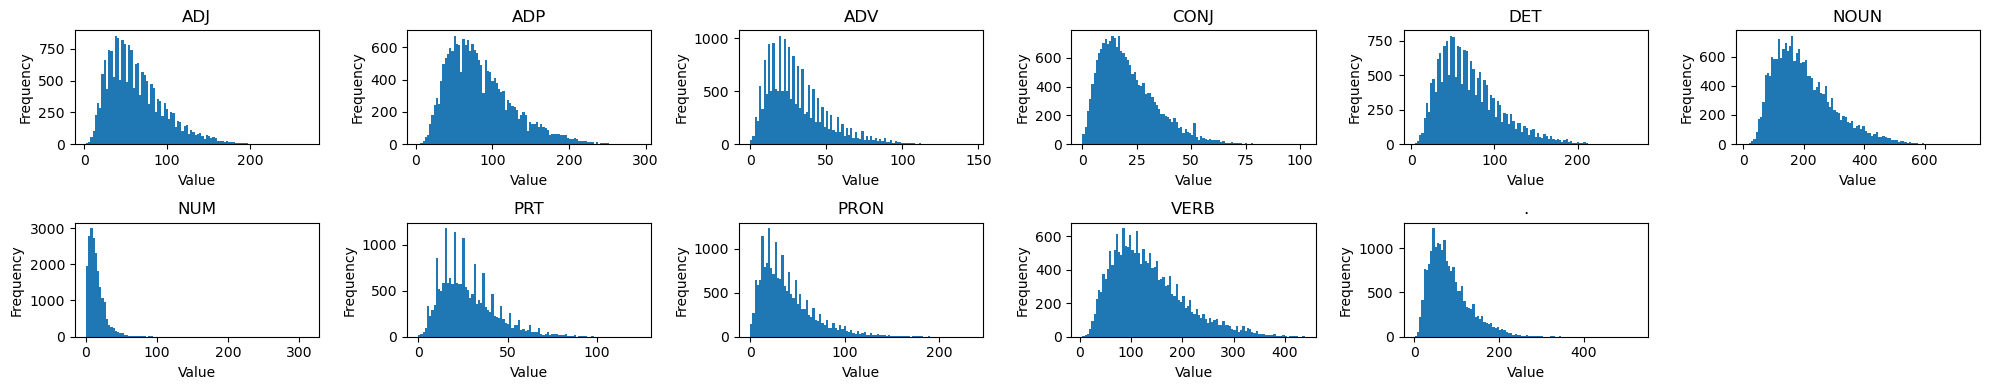

In [58]:
# Analyze POS tag distribution on the acrticle df
plot_histograms(df_article, num_rows=2, num_cols=6)

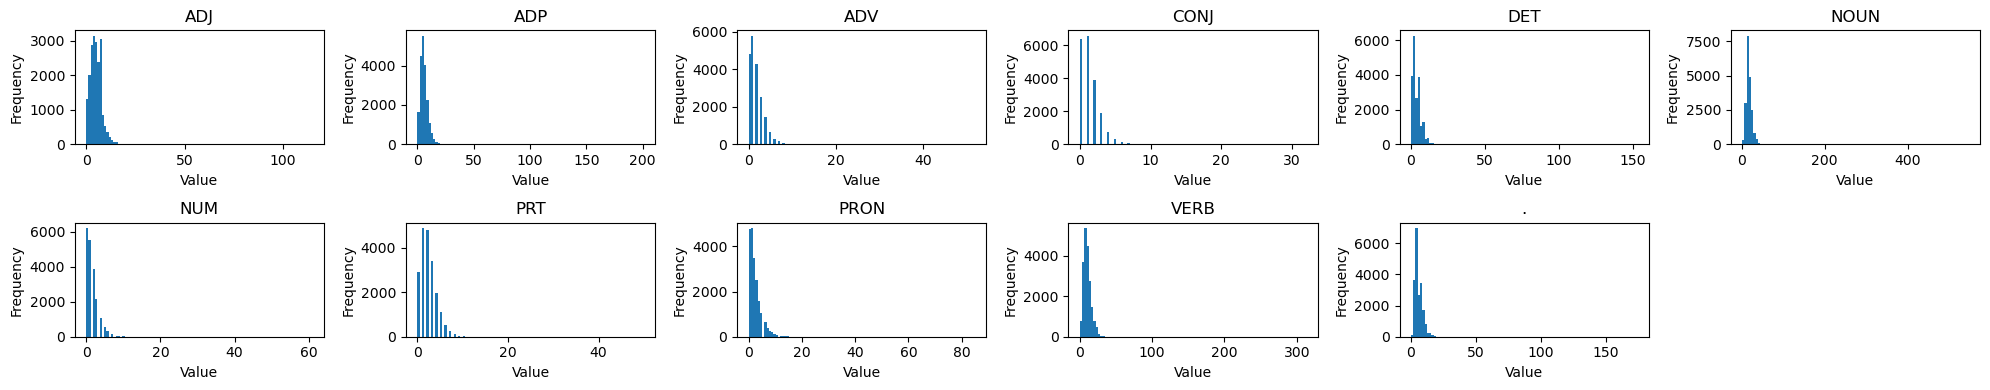

In [59]:
# Analyze POS tag distribution on the summary df
plot_histograms(df_summary, num_rows=2, num_cols=6)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

# Apply the count vectorized method to the data
tf = tf_vectorizer.fit_transform(df_lower['article'])

# Build the Document Term Matrix
tf_feature_names = tf_vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))

# Perform Topic Modeling using Latent Dirichlet Allocation (LDA)
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(tf)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
print_top_words(lda_model, tf_feature_names, n_top_words)

Topic 1:
he, his, said, had, after, police, from, were, by, been

Topic 2:
it, are, as, be, by, from, have, has, said, will

Topic 3:
her, she, it, he, his, as, but, you, said, have

Topic 4:
his, he, it, as, but, has, have, be, we, after

Topic 5:
said, he, by, his, as, have, has, who, not, an



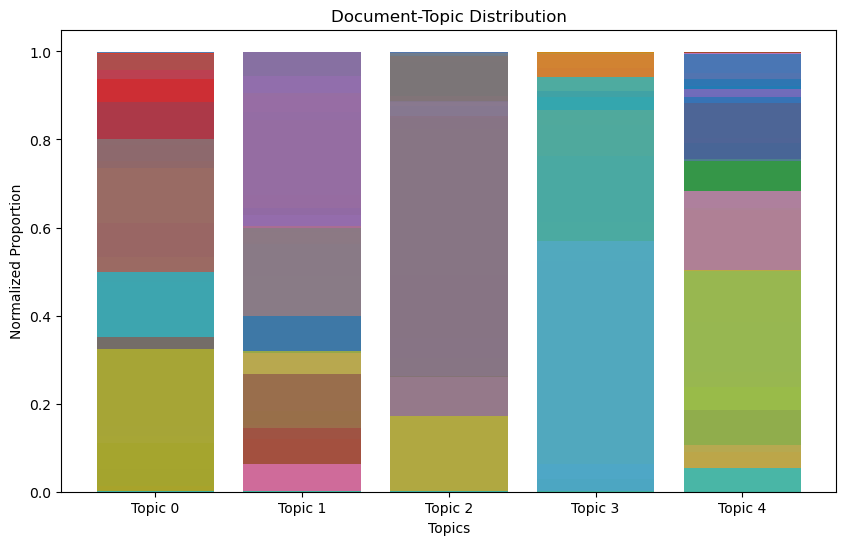

In [65]:
def plot_document_topic_distribution(model_output):
    # Normalize the document-topic distribution
    normalized_output = model_output / model_output.sum(axis=1)[:, np.newaxis]

    # Create a bar plot to visualize the document-topic distribution
    plt.figure(figsize=(10, 6))
    topics = [f'Topic {i}' for i in range(lda_model.n_components)]
    for i in range(normalized_output.shape[0]):
        plt.bar(topics, normalized_output[i], alpha=0.7)
    plt.xlabel('Topics')
    plt.ylabel('Normalized Proportion')
    plt.title('Document-Topic Distribution')
    plt.show()

# Visualize the document-topic distribution
plot_document_topic_distribution(lda_output)

/var/folders/xf/qvg6j60s7hddvx8mt5qky8gr0000gn/T/ipykernel_60047/3457986989.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top_features)


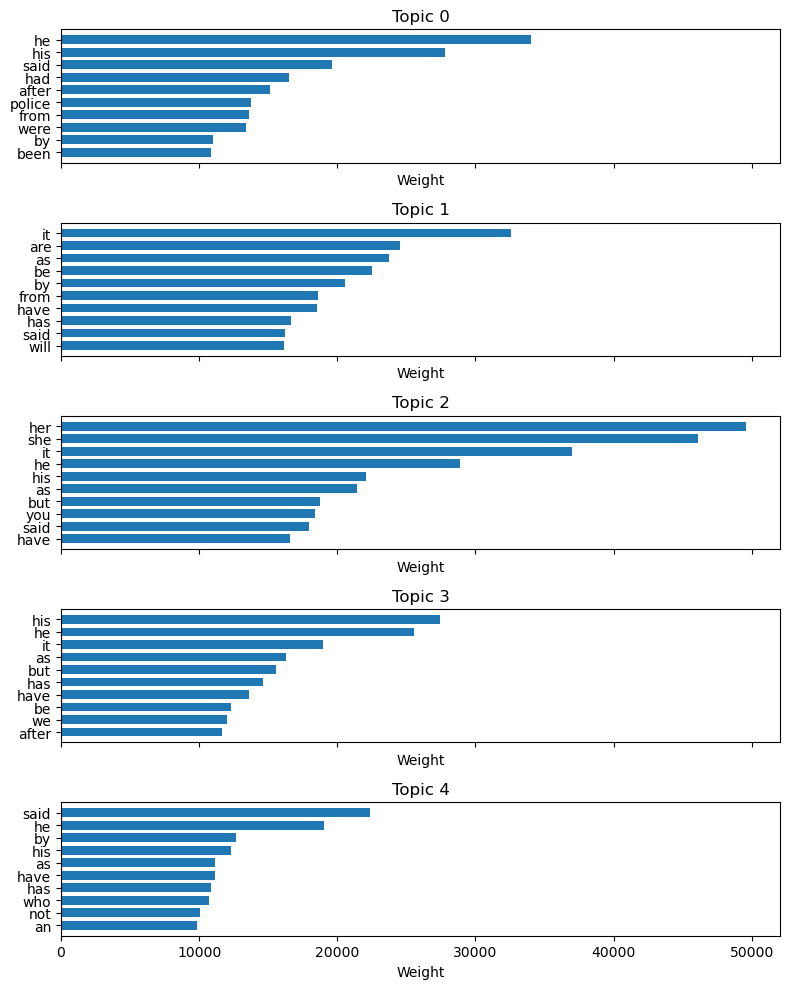

In [66]:
#Visualize the top words for each topic
def plot_top_words(model, feature_names, n_top_words):
    fig, axes = plt.subplots(nrows=model.n_components, ncols=1, figsize=(8, 2 * model.n_components),
                             sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_yticklabels(top_features)
        ax.invert_yaxis()
        ax.set_xlabel('Weight')
        ax.set_title(f'Topic {topic_idx}')
    plt.tight_layout()
    plt.show()

# Visualize the top words for each topic
n_top_words = 10
plot_top_words(lda_model, tf_feature_names, n_top_words)